<a href="https://colab.research.google.com/github/kushal-g/FlightDelayPredictor/blob/master/DelayDistributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
from multiprocessing import Pool

In [0]:
import matplotlib as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
df = pd.read_csv("flights.csv",dtype={"ORIGIN_AIRPORT":object,"DESTINATION_AIRPORT":object}).drop(["CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"],axis=1)

In [0]:
df.dropna(inplace=True)

In [0]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [0]:
plt.rcParams["figure.figsize"] = [16,9]

(array([2.000000e+00, 2.700000e+01, 4.648000e+03, 3.594282e+06,
        1.291054e+06, 3.529460e+05, 1.625280e+05, 9.827800e+04,
        6.244200e+04, 4.022200e+04, 2.927100e+04, 2.054700e+04,
        1.473500e+04, 1.021100e+04, 7.689000e+03, 5.750000e+03,
        3.912000e+03, 3.200000e+03, 2.377000e+03, 1.806000e+03,
        1.470000e+03, 1.137000e+03, 8.290000e+02, 6.400000e+02,
        5.790000e+02, 4.840000e+02, 3.720000e+02, 2.970000e+02,
        2.640000e+02, 2.130000e+02, 1.750000e+02, 1.450000e+02,
        1.220000e+02, 9.900000e+01, 8.600000e+01, 9.800000e+01,
        6.700000e+01, 7.700000e+01, 7.000000e+01, 5.800000e+01,
        6.900000e+01, 5.800000e+01, 4.800000e+01, 4.700000e+01,
        5.600000e+01, 5.000000e+01, 4.000000e+01, 4.000000e+01,
        3.800000e+01, 3.000000e+01, 2.400000e+01, 3.000000e+01,
        2.800000e+01, 1.700000e+01, 2.600000e+01, 2.600000e+01,
        9.000000e+00, 1.800000e+01, 1.300000e+01, 1.300000e+01,
        1.400000e+01, 9.000000e+00, 1.50

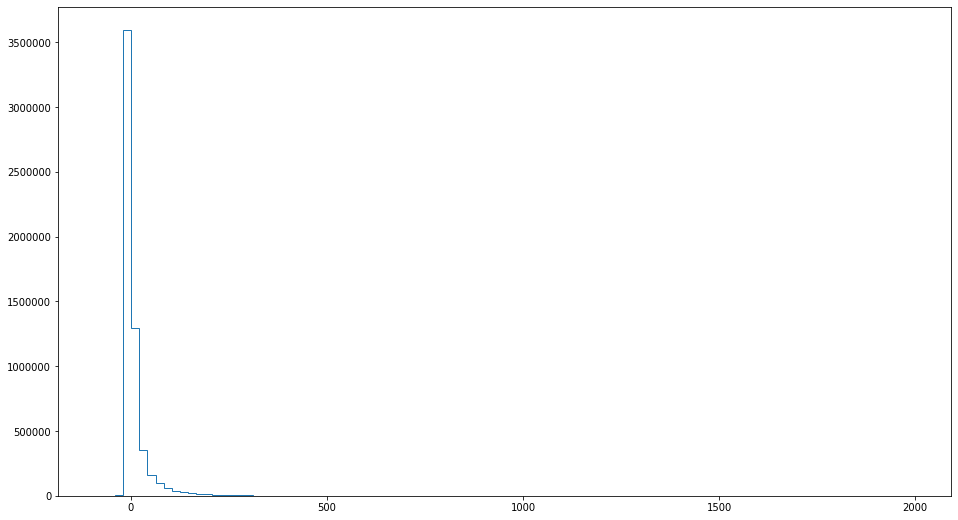

In [65]:
plt.pyplot.hist(df.DEPARTURE_DELAY, bins=100,histtype="step")

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 2.000000e+00, 1.000000e+00, 0.000000e+00,
        4.000000e+00, 7.000000e+00, 2.400000e+01, 3.800000e+01,
        4.100000e+01, 7.400000e+01, 1.440000e+02, 3.710000e+02,
        9.890000e+02, 2.979000e+03, 4.936000e+03, 2.105600e+04,
        6.958800e+04, 2.752350e+05, 7.389430e+05, 8.809560e+05,
        1.275126e+06, 6.091410e+05, 2.814380e+05, 2.072400e+05,
        1.638780e+05, 9.046800e+04, 1.155100e+05, 9.607400e+04,
        8.122300e+04, 6.924000e+04, 4.073100e+04, 5.542800e+04,
        4.746600e+04, 4.271800e+04, 3.783200e+04, 3.405500e+04,
        2.104800e+04, 2.913600e+04, 2.626400e+04, 2.414800e+04,
        2.245900e+04, 1.378100e+04, 1.961800e+04, 1.760000e+04,
        1.666700e+04, 1.532000e+04, 1.392800e+04, 8.943000e+03,
        1.255200e+04, 1.187600e+04, 1.109200e+04, 1.055000e+04,
        9.938000e+03, 6.127000e+03, 8.76

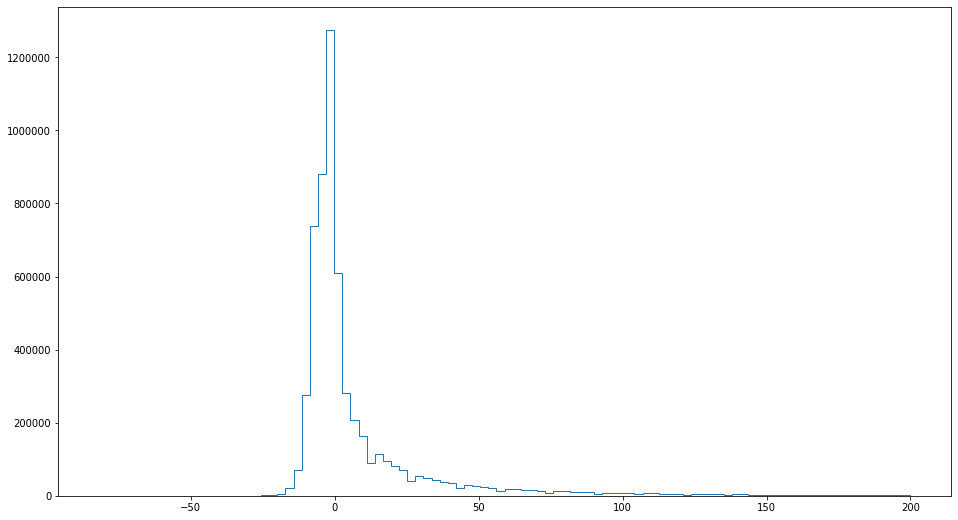

In [0]:
plt.pyplot.hist(df.DEPARTURE_DELAY, bins=100,range=(df.DEPARTURE_DELAY.min(),200),histtype="step")

(array([1.090000e+02, 7.716000e+03, 2.449060e+05, 2.668488e+06,
        1.769291e+06, 4.825550e+05, 2.020820e+05, 1.059300e+05,
        7.023900e+04, 4.458000e+04, 3.266900e+04, 2.192400e+04,
        1.634700e+04, 1.174900e+04, 8.116000e+03, 6.259000e+03,
        4.427000e+03, 3.419000e+03, 2.592000e+03, 2.058000e+03,
        1.560000e+03, 1.177000e+03, 9.060000e+02, 7.110000e+02,
        6.260000e+02, 4.840000e+02, 3.720000e+02, 3.410000e+02,
        2.820000e+02, 2.430000e+02, 1.700000e+02, 1.540000e+02,
        1.320000e+02, 1.030000e+02, 1.100000e+02, 8.800000e+01,
        7.000000e+01, 7.000000e+01, 6.400000e+01, 7.500000e+01,
        6.900000e+01, 6.600000e+01, 4.600000e+01, 4.900000e+01,
        5.100000e+01, 4.300000e+01, 3.900000e+01, 4.400000e+01,
        4.000000e+01, 2.800000e+01, 3.200000e+01, 2.100000e+01,
        2.600000e+01, 2.900000e+01, 2.600000e+01, 2.500000e+01,
        1.300000e+01, 1.400000e+01, 1.300000e+01, 1.700000e+01,
        9.000000e+00, 1.600000e+01, 9.00

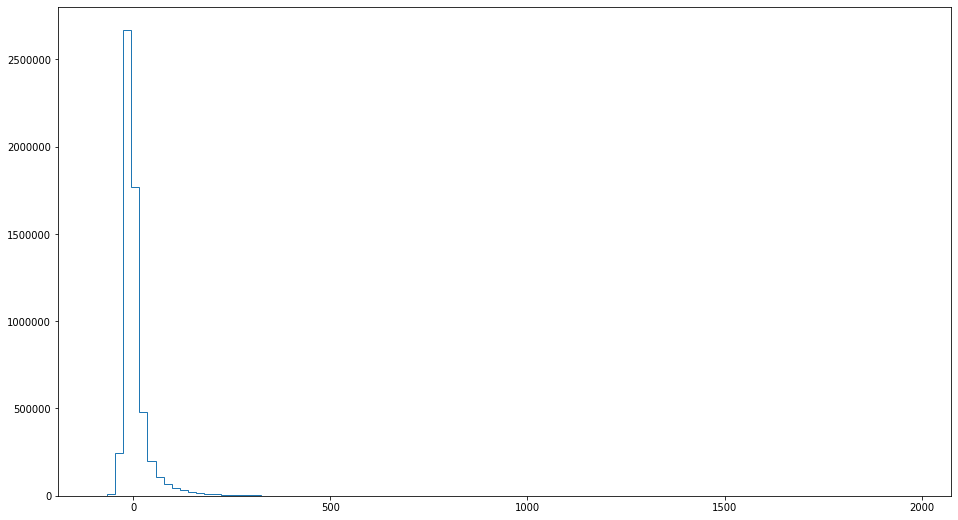

In [66]:
plt.pyplot.hist(df.ARRIVAL_DELAY, bins=100,histtype="step")

(array([2.00000e+00, 1.00000e+00, 7.00000e+00, 6.00000e+00, 1.20000e+01,
        2.60000e+01, 5.50000e+01, 5.30000e+01, 1.60000e+02, 3.02000e+02,
        4.95000e+02, 9.16000e+02, 1.60000e+03, 2.83200e+03, 4.76300e+03,
        4.79700e+03, 1.13430e+04, 1.88020e+04, 3.12480e+04, 5.18550e+04,
        8.51920e+04, 1.34566e+05, 2.04934e+05, 1.86037e+05, 3.58208e+05,
        4.49978e+05, 5.12003e+05, 5.27439e+05, 4.91059e+05, 4.22208e+05,
        2.40467e+05, 2.95063e+05, 2.34373e+05, 1.85530e+05, 1.50181e+05,
        1.21716e+05, 9.96880e+04, 8.41840e+04, 4.89870e+04, 6.44180e+04,
        5.58050e+04, 4.89810e+04, 4.27730e+04, 3.83550e+04, 3.45770e+04,
        3.08380e+04, 1.91610e+04, 2.62460e+04, 2.41990e+04, 2.18400e+04,
        2.01360e+04, 1.86410e+04, 1.66950e+04, 1.08320e+04, 1.50540e+04,
        1.40410e+04, 1.32280e+04, 1.21690e+04, 1.14680e+04, 1.07820e+04,
        1.02080e+04, 6.41100e+03, 9.21100e+03, 8.74900e+03, 8.00900e+03,
        7.63800e+03, 7.11200e+03, 6.85100e+03, 6.51

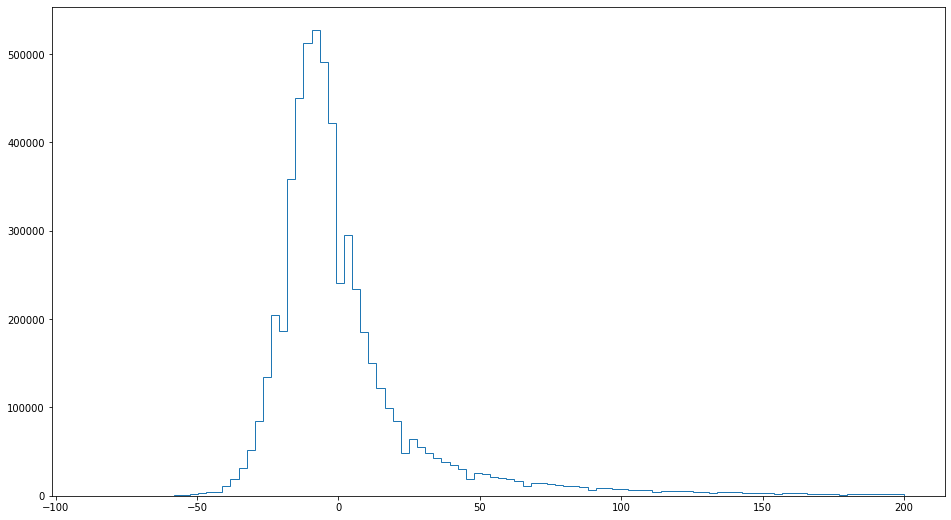

In [68]:
plt.pyplot.hist(df.ARRIVAL_DELAY, bins=100,range = (df.ARRIVAL_DELAY.min(),200),histtype="step")